In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Reading Habit Project Code/Reading Habits.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from math import sqrt
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

sns.set_style("whitegrid")

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Logistics Regression/dataset/Reading Habits Among Undergraduate Students Of Daffodil International University. (Responses).xlsx")
df.head()

,Timestamp,Gender,Age,Department of,Amount of time spent reading books per day,Reason for reading books,How to manage books for reading,Number of e-books you read last two years,Number of printed books you read last two years,Favorite books for reading to spend leisure time,Which type of books do you read most of the time,What is the change that you fell after reading books,Who influenced you to read books,Which language books do you like to read,Where do you read printed books,Do you read Newspaper,The format that you used for reading books,Frequency of reading non-academic books
0,2023-01-26 22:07:01.065,Male,22,CSE,More than three hours,Academic Purpose,E-books,11-15,11-15,Biography,Academic Books,Increase Academic Performance,Teachers,English,Home,No,Both,On everyday basis
1,2023-01-26 22:28:08.635,Male,More than 22,CSE,Two hours,Keep me informative,E-books,More than 20,1-5,Non-Fiction,Non-academic books,Increase Creative Thinking,Self Decision,English,Library,Yes,Both,A few times a week
2,2023-01-26 22:28:54.314,Male,22,CSE,Less than one hour,Academic Purpose,E-books,1-5,1-5,Others,Non-academic books,Increase Creative Thinking,Self Decision,English,Home,No,E-books,A few times a month
3,2023-01-27 00:23:25.199,Female,21,CSE,Less than one hour,Entertainment Purpose,Borrow books from friends,1-5,1-5,Others,Academic Books,Feel Relax,Friends,Bangla,Home,Yes,Printed books,A few times a week
4,2023-01-27 00:27:16.989,Male,More than 22,CSE,Less than one hour,Keep me informative,E-books,More than 20,1-5,Others,Non-academic books,Feel Relax,Self Decision,Bangla,Home,No,Both,Less than once a year


In [3]:
df.drop(labels='Timestamp' ,inplace=True, axis=1)
df.drop(labels='Frequency of reading non-academic books' ,inplace=True, axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Gender                                                582 non-null    object
 1   Age                                                   582 non-null    object
 2   Department of                                         582 non-null    object
 3   Amount of time spent reading books per day            582 non-null    object
 4   Reason for reading books                              582 non-null    object
 5   How to manage books for reading                       582 non-null    object
 6   Number of e-books you read last two years             582 non-null    object
 7   Number of printed books you read last two years       582 non-null    object
 8   Favorite books for reading to spend leisure time      582 non-null    

In [5]:
df.stack()

0    Gender                                                         Male
     Age                                                              22
     Department of                                                   CSE
     Amount of time spent reading books per day    More than three hours
     Reason for reading books                           Academic Purpose
                                                           ...          
581  Who influenced you to read books                           Teachers
     Which language books do you like to read                     Bangla
     Where do you read printed books                       During Travel
     Do you read Newspaper                                           Yes
     The format that you used for reading books                     Both
Length: 9312, dtype: object

## ***Gender:***

In [6]:
print("Gender stats")
df["Gender"].value_counts()

Gender stats


Male      426
Female    156
Name: Gender, dtype: int64

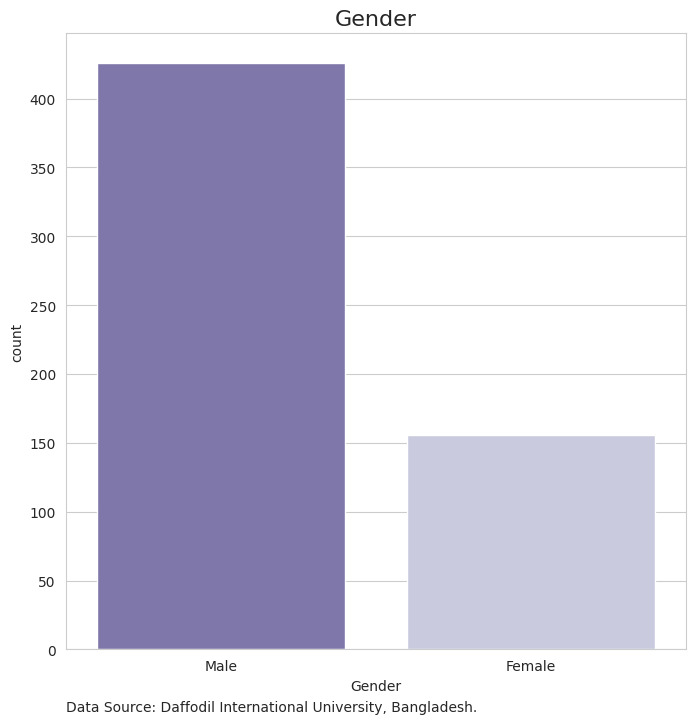

In [7]:
# create graph
plt.figure(figsize=(8,8))
sns.countplot(x= "Gender", data = df, palette = "Purples_r", order = df["Gender"].value_counts().index )

# format graph
plt.title("Gender", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

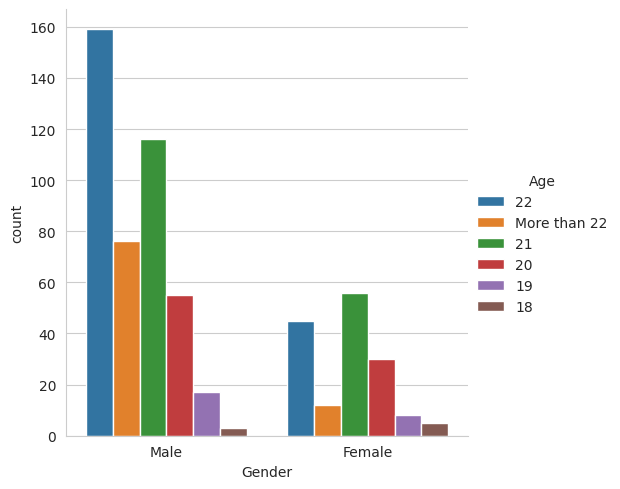

In [8]:
sns.catplot(x='Gender',hue='Age',kind='count',data=df)

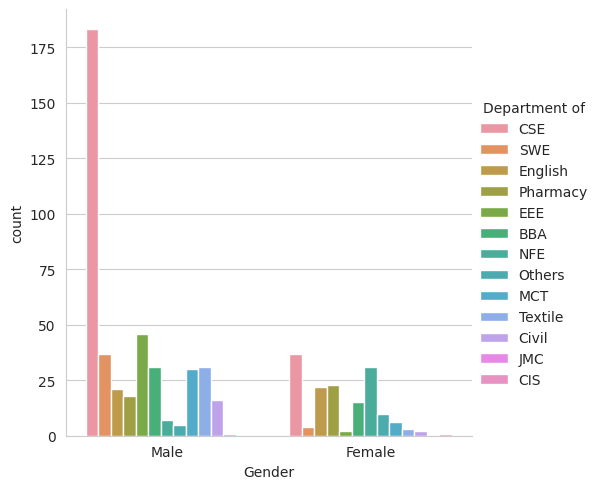

In [9]:
sns.catplot(x='Gender',hue='Department of',kind='count',data=df)

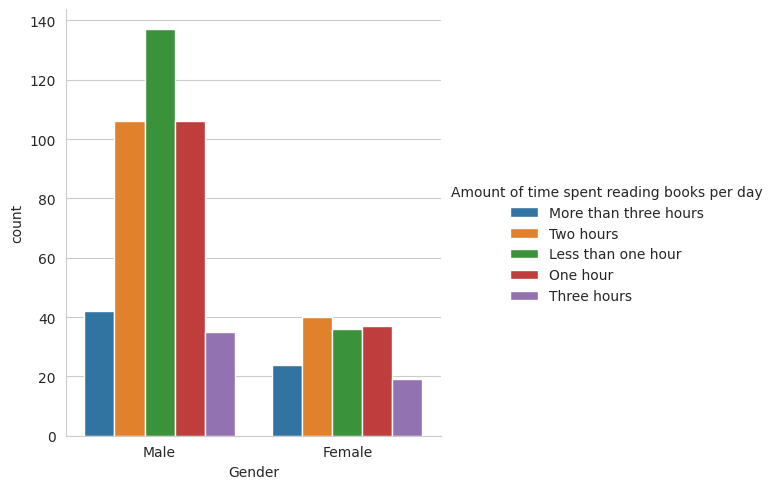

In [10]:
sns.catplot(x='Gender',hue='Amount of time spent reading books per day',kind='count',data=df)

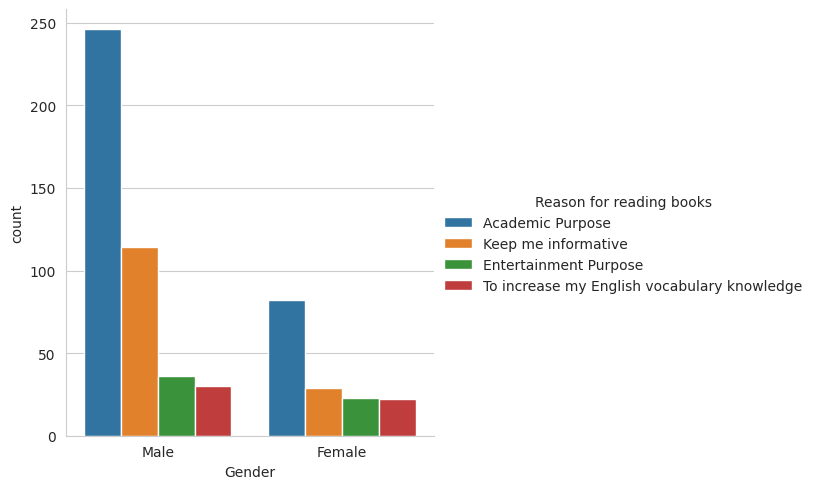

In [11]:
sns.catplot(x='Gender',hue='Reason for reading books',kind='count',data=df)

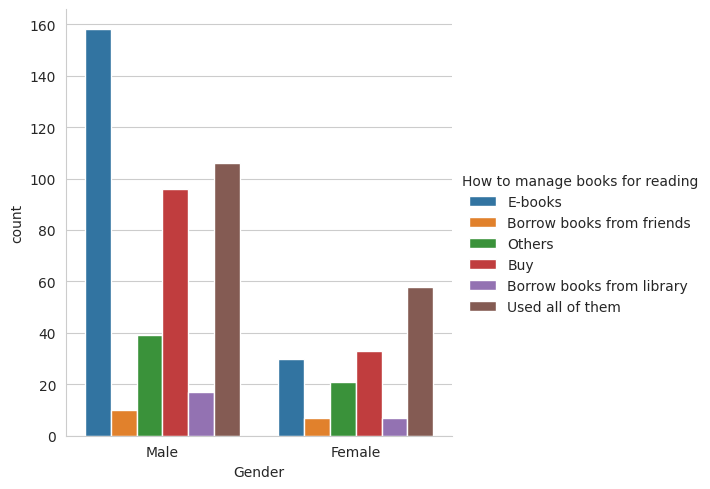

In [12]:
sns.catplot(x='Gender',hue='How to manage books for reading',kind='count',data=df)

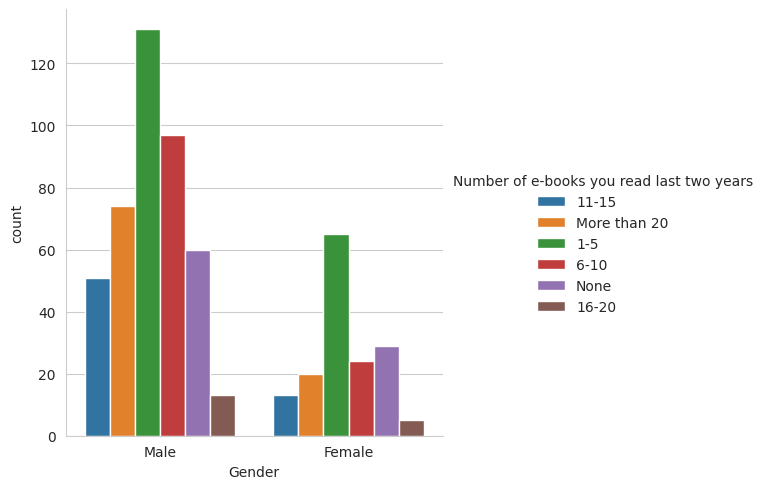

In [13]:
sns.catplot(x='Gender',hue='Number of e-books you read last two years',kind='count',data=df)

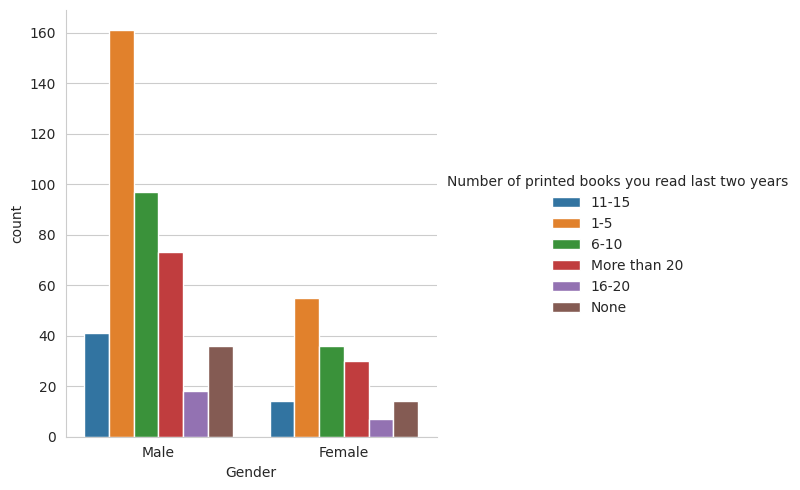

In [14]:
sns.catplot(x='Gender',hue='Number of printed books you read last two years',kind='count',data=df)

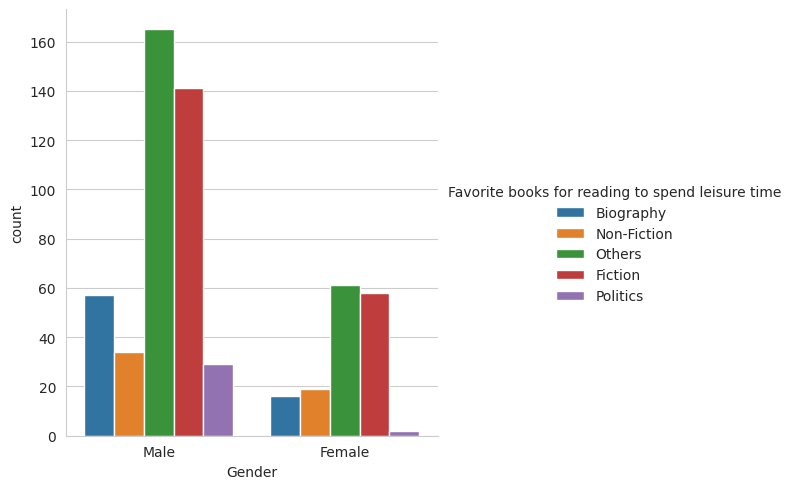

In [15]:
sns.catplot(x='Gender',hue='Favorite books for reading to spend leisure time',kind='count',data=df)

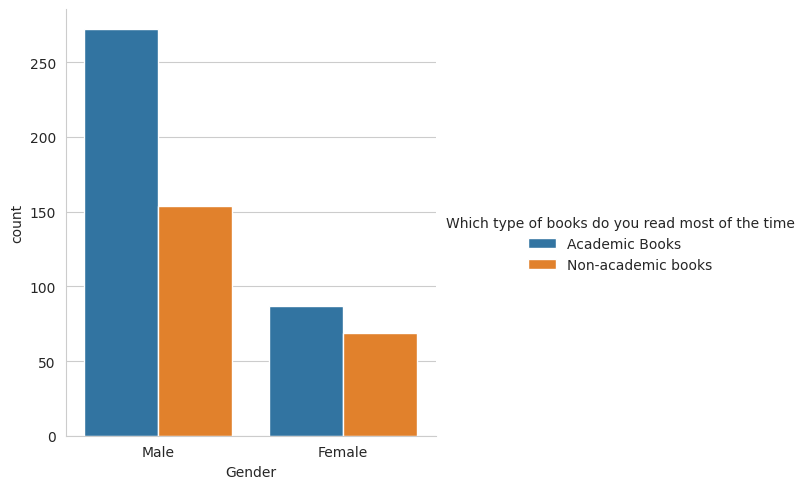

In [16]:
sns.catplot(x='Gender',hue='Which type of books do you read most of the time',kind='count',data=df)

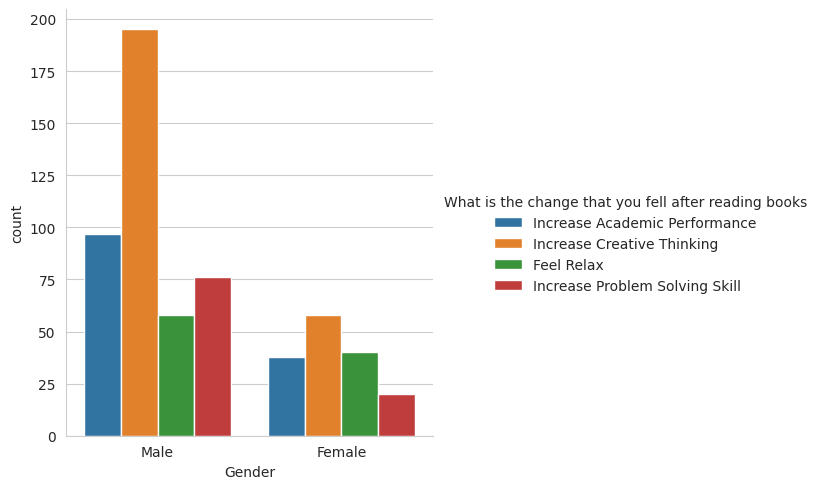

In [17]:
sns.catplot(x='Gender',hue='What is the change that you fell after reading books',kind='count',data=df)

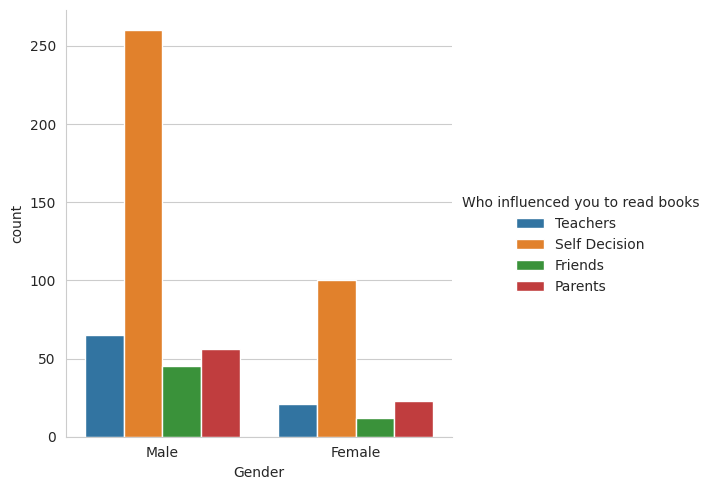

In [18]:
sns.catplot(x='Gender',hue='Who influenced you to read books',kind='count',data=df)

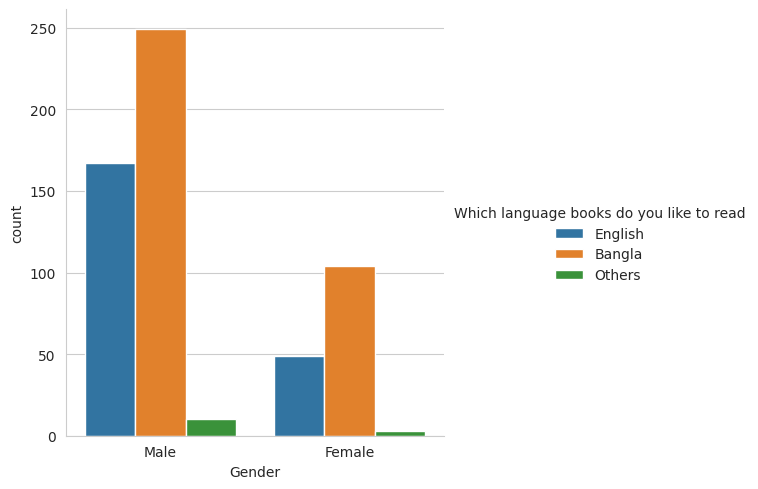

In [19]:
sns.catplot(x='Gender',hue='Which language books do you like to read',kind='count',data=df)

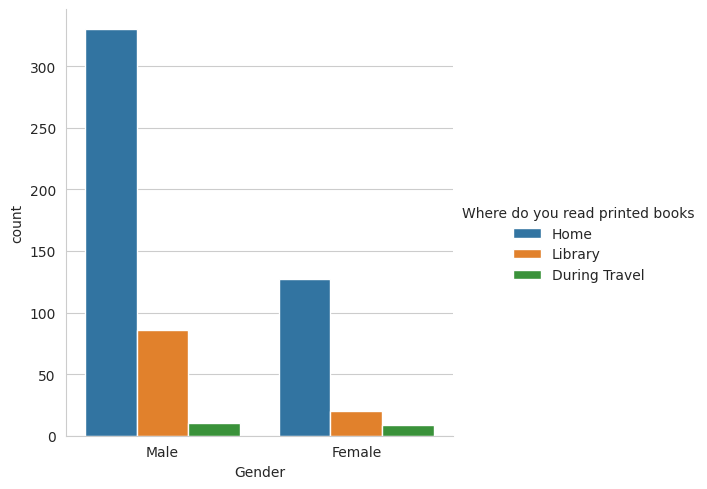

In [20]:
sns.catplot(x='Gender',hue='Where do you read printed books',kind='count',data=df)

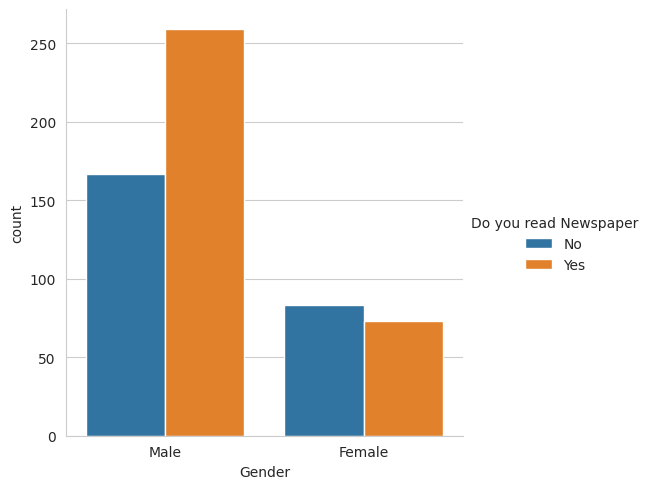

In [21]:
sns.catplot(x='Gender',hue='Do you read Newspaper',kind='count',data=df)

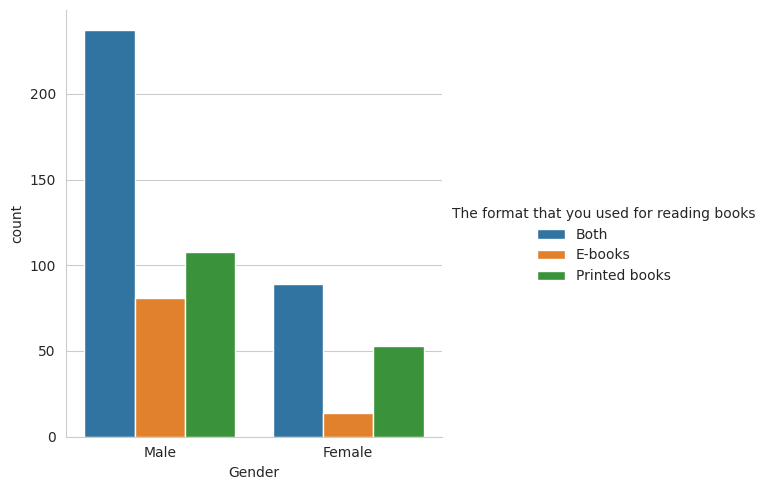

In [22]:
sns.catplot(x='Gender',hue='The format that you used for reading books',kind='count',data=df)

In [23]:
print(round((df[df["Gender"]=="Female"].shape[0]/df.shape[0])*100,2),"% of the participents were female")

26.8 % of the participents were female


In [24]:
print(round((df[df["Gender"]=="Male"].shape[0]/df.shape[0])*100,2),"% of the participents were male")

73.2 % of the participents were male


# **Age**

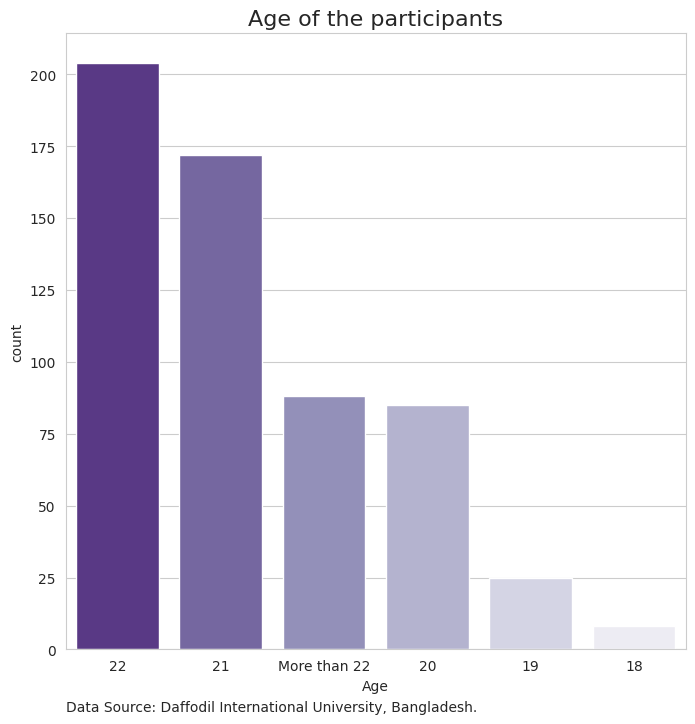

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(x= "Age", data = df, palette = "Purples_r", order = df["Age"].value_counts().index )

plt.title("Age of the participants", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

In [26]:
print("Age")
df["Age"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

Age


,value
Stat,
22,204
21,172
More than 22,88
20,85
19,25
18,8


In [27]:
df["Age"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,6
top,22
freq,204


# Department

In [28]:
df["Department of"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
CSE,220
EEE,48
BBA,46
English,43
SWE,41
Pharmacy,41
NFE,38
MCT,36
Textile,34


In [29]:
print("Stats Of Department")
df["Department of"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

Stats Of Department


,value
Stat,
count,582
unique,13
top,CSE
freq,220


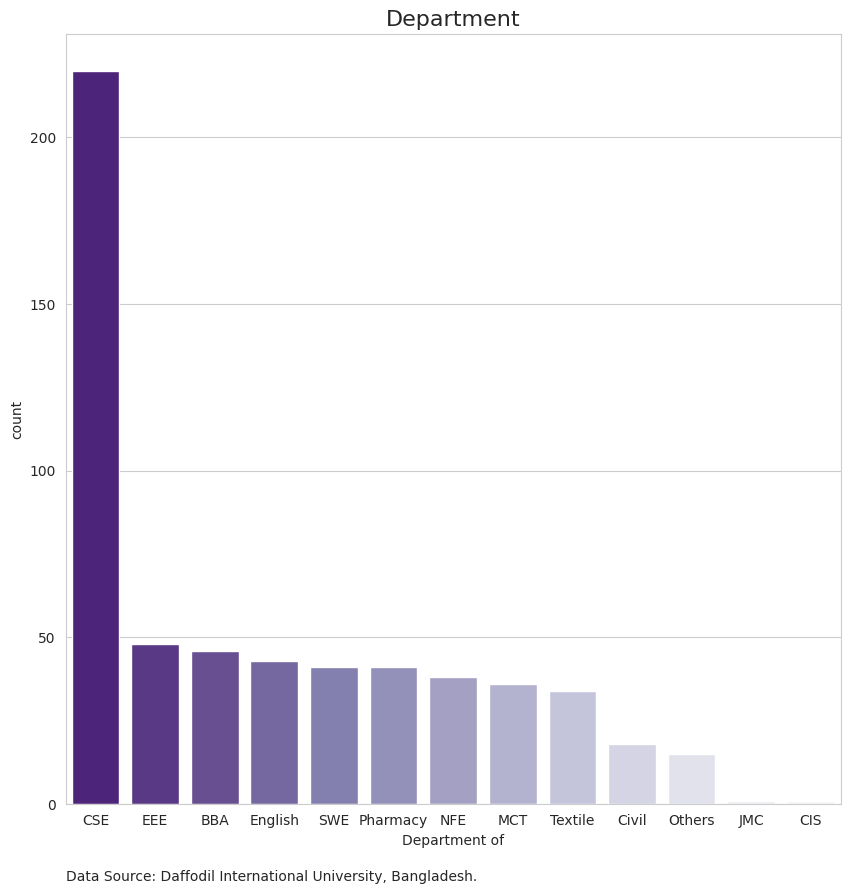

In [30]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "Department of", data = df, palette = "Purples_r", order = df["Department of"].value_counts().index )

# format graph
plt.title("Department", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

# Amount of time spent reading books per day

In [31]:
print("Stats Of Reading Per Day")
df["Amount of time spent reading books per day"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

Stats Of Reading Per Day


,value
Stat,
Less than one hour,173
Two hours,146
One hour,143
More than three hours,66
Three hours,54


In [32]:
print("Stats Of Reading Per Day")
df["Amount of time spent reading books per day"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

Stats Of Reading Per Day


,value
Stat,
count,582
unique,5
top,Less than one hour
freq,173


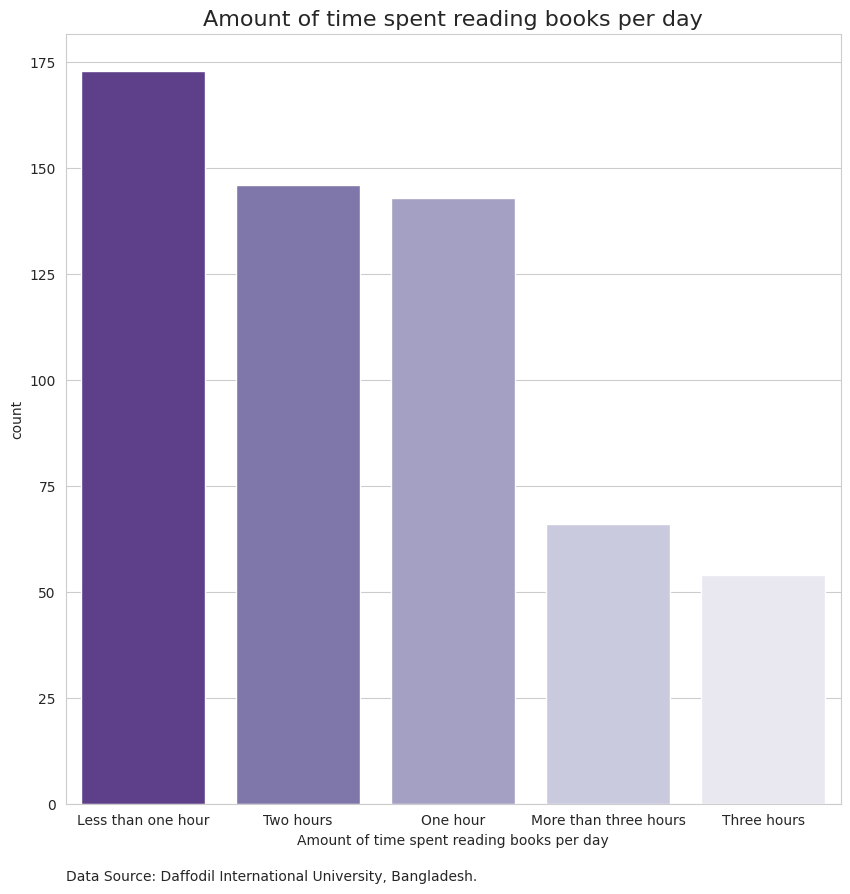

In [33]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "Amount of time spent reading books per day", data = df, palette = "Purples_r", order = df["Amount of time spent reading books per day"].value_counts().index )

# format graph
plt.title("Amount of time spent reading books per day", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

# Reason for reading books

In [34]:
df["Reason for reading books"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
Academic Purpose,328
Keep me informative,143
Entertainment Purpose,59
To increase my English vocabulary knowledge,52


In [35]:
df["Reason for reading books"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,4
top,Academic Purpose
freq,328


<Axes: >

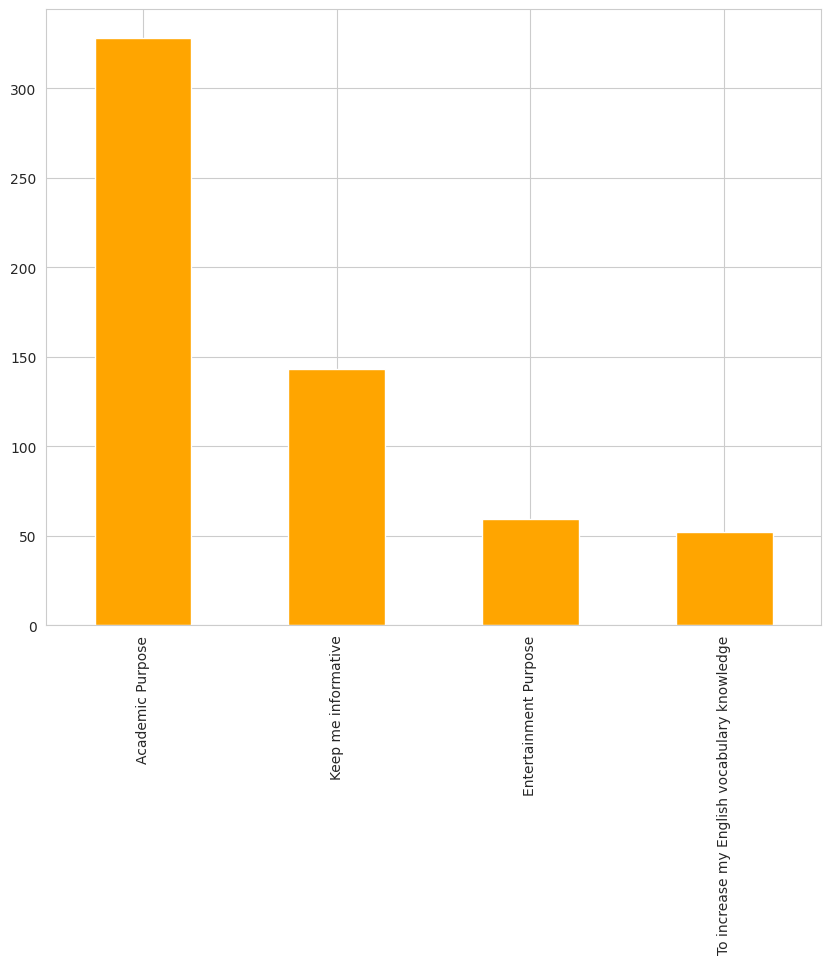

In [36]:
df['Reason for reading books'].value_counts().plot(kind="bar", figsize=(10,8), color='orange')

# How to manage books for reading

In [37]:
df["How to manage books for reading"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
E-books,188
Used all of them,164
Buy,129
Others,60
Borrow books from library,24
Borrow books from friends,17


In [38]:
df["How to manage books for reading"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,6
top,E-books
freq,188


<Axes: >

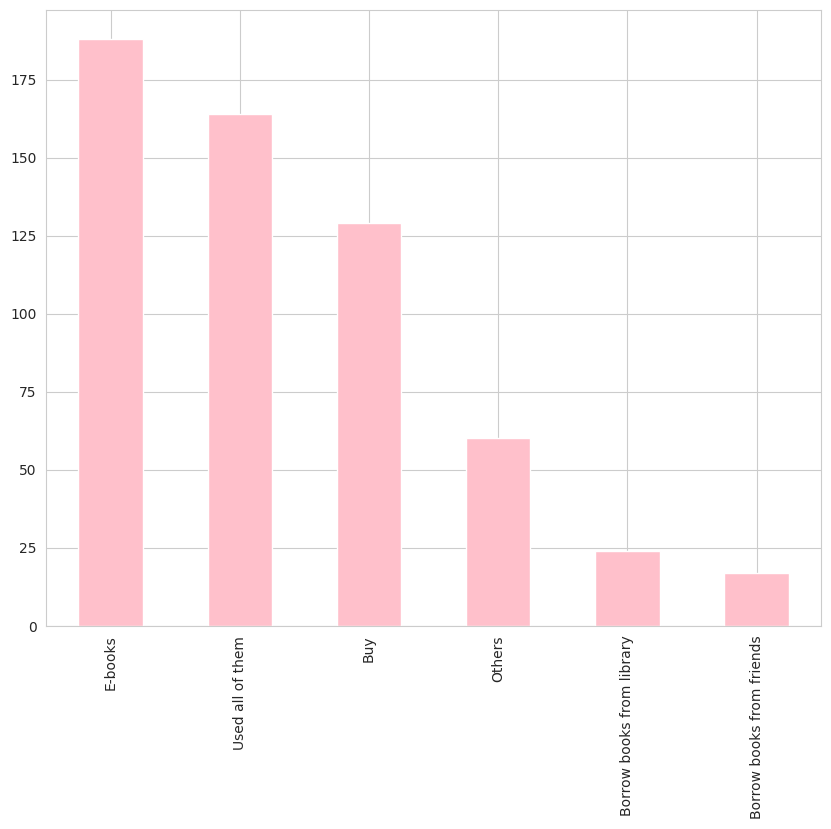

In [39]:
df['How to manage books for reading'].value_counts().plot(kind="bar",figsize=(10,8), color='pink')

# Number of e-books you read last two years

In [40]:
df["Number of e-books you read last two years"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
1-5,196
6-10,121
More than 20,94
None,89
11-15,64
16-20,18


In [41]:
df["Number of e-books you read last two years"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,6
top,1-5
freq,196


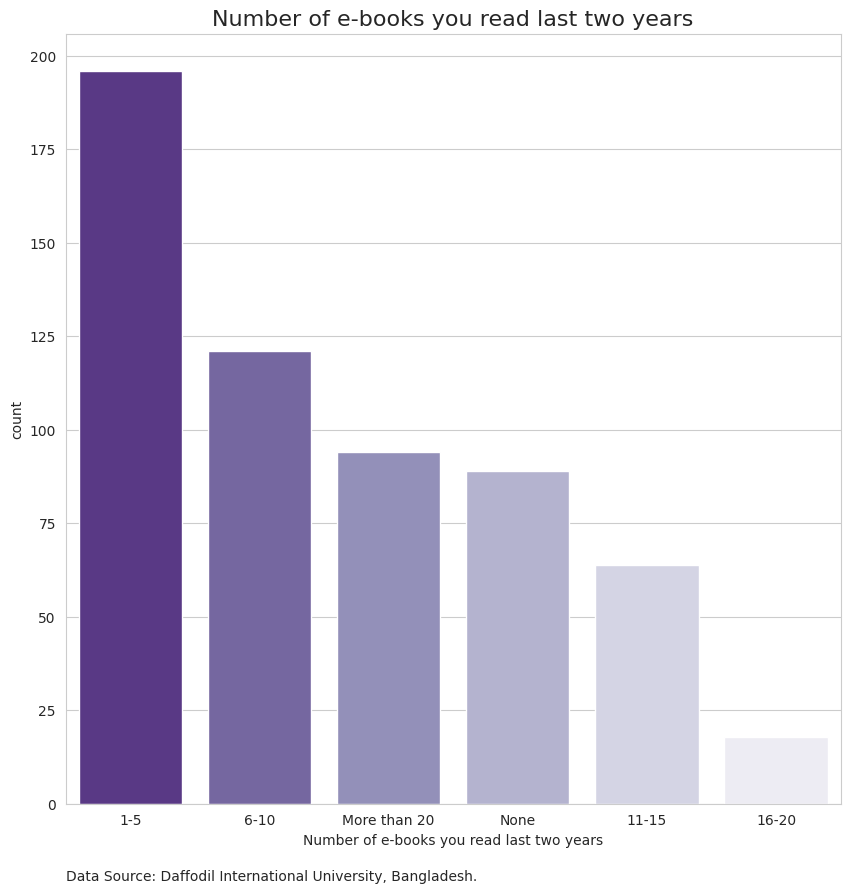

In [42]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "Number of e-books you read last two years", data = df, palette = "Purples_r", order = df["Number of e-books you read last two years"].value_counts().index )

# format graph
plt.title("Number of e-books you read last two years", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

# Number of printed books you read last two years

In [43]:
df["Number of printed books you read last two years"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
1-5,216
6-10,133
More than 20,103
11-15,55
None,50
16-20,25


In [44]:
df["Number of printed books you read last two years"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,6
top,1-5
freq,216


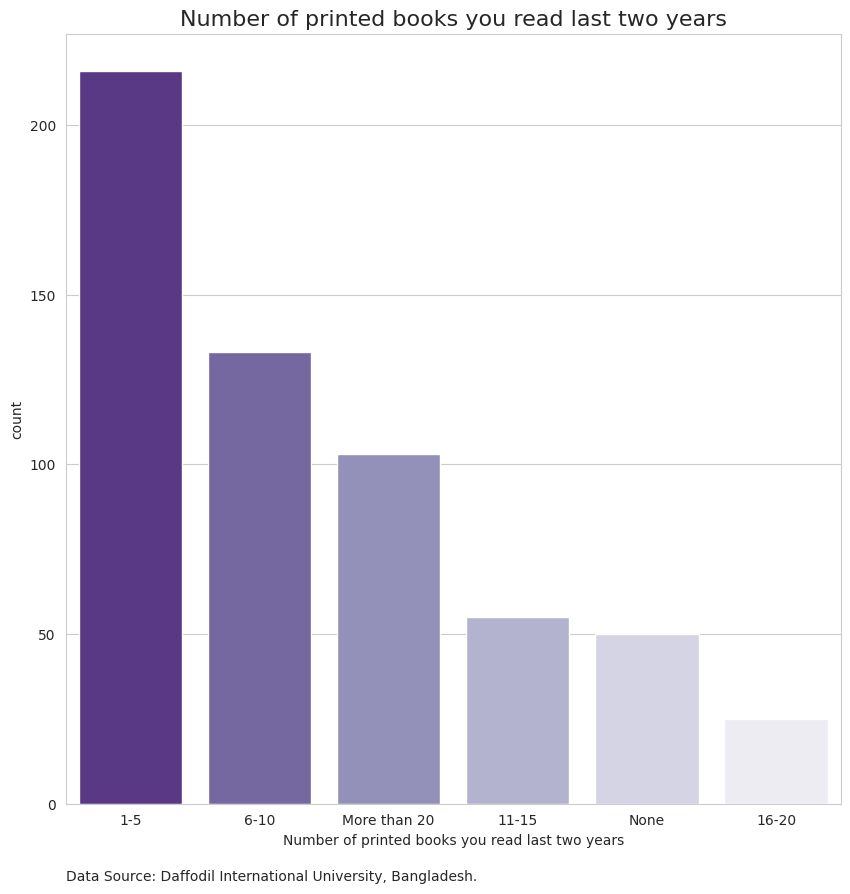

In [45]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "Number of printed books you read last two years", data = df, palette = "Purples_r", order = df["Number of printed books you read last two years"].value_counts().index )

# format graph
plt.title("Number of printed books you read last two years", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

# Favorite books for reading to spend leisure time

In [46]:
df["Favorite books for reading to spend leisure time"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
Others,226
Fiction,199
Biography,73
Non-Fiction,53
Politics,31


In [47]:
df["Favorite books for reading to spend leisure time"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,5
top,Others
freq,226


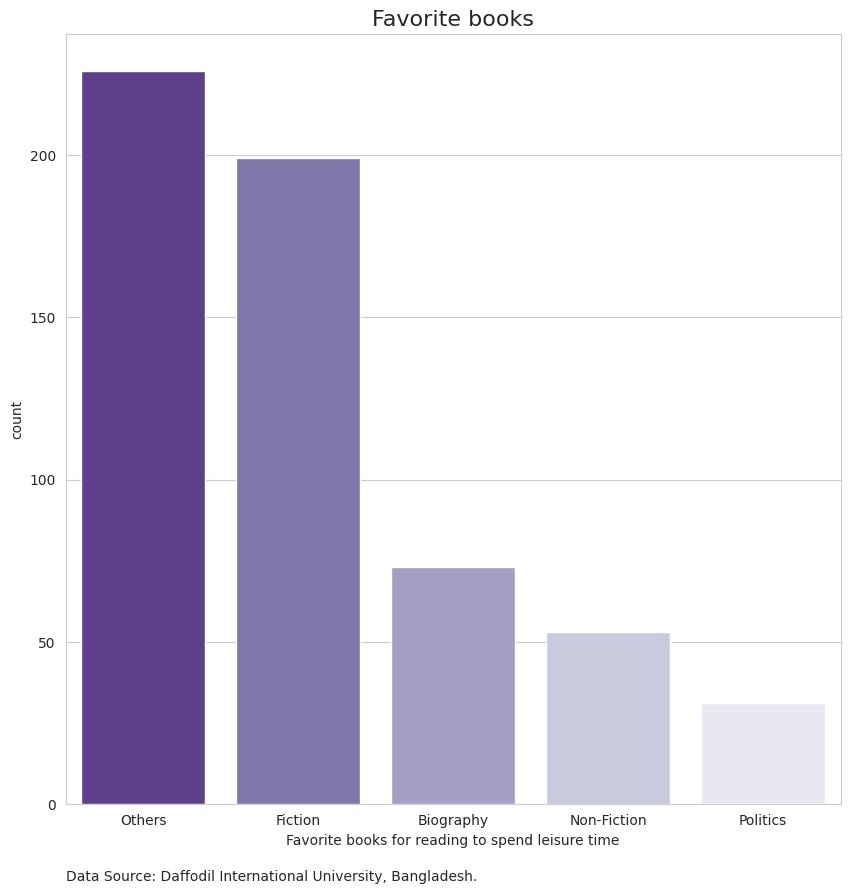

In [48]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "Favorite books for reading to spend leisure time", data = df, palette = "Purples_r", order = df["Favorite books for reading to spend leisure time"].value_counts().index )

# format graph
plt.title("Favorite books", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

# Which type of books do you read most of the time

In [49]:
df["Which type of books do you read most of the time"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
Academic Books,359
Non-academic books,223


In [50]:
df["Which type of books do you read most of the time"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,2
top,Academic Books
freq,359


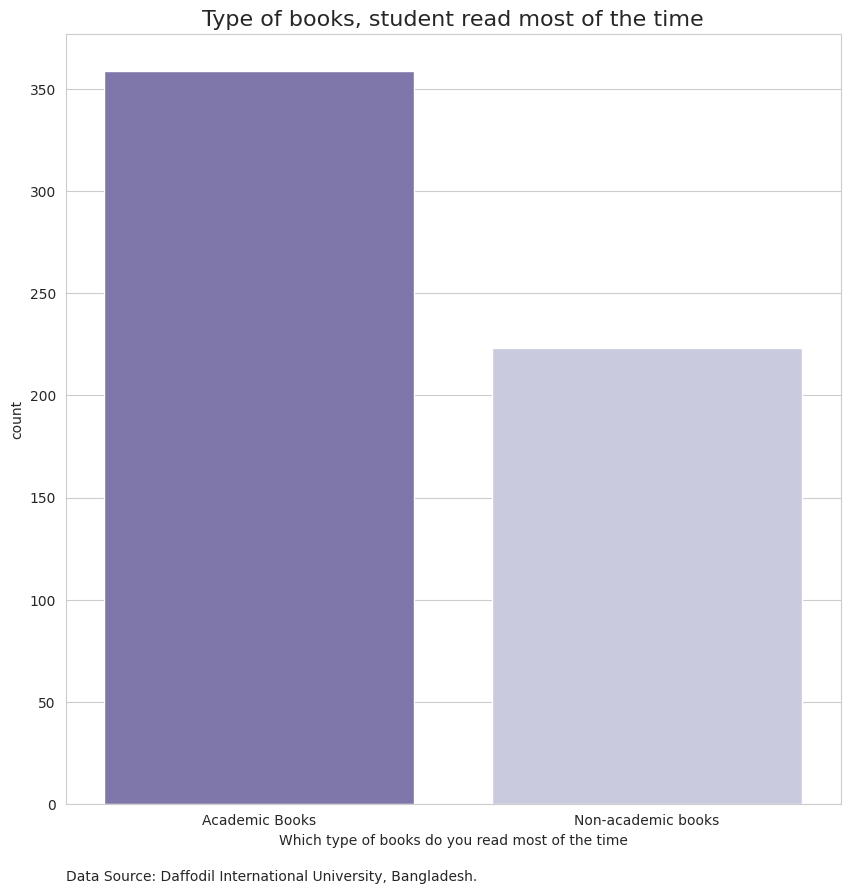

In [51]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "Which type of books do you read most of the time", data = df, palette = "Purples_r", order = df["Which type of books do you read most of the time"].value_counts().index )

# format graph
plt.title("Type of books, student read most of the time", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

# What is the change that you fell after reading books

In [52]:
df["What is the change that you fell after reading books"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
Increase Creative Thinking,253
Increase Academic Performance,135
Feel Relax,98
Increase Problem Solving Skill,96


In [53]:
df["What is the change that you fell after reading books"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,4
top,Increase Creative Thinking
freq,253


<Axes: >

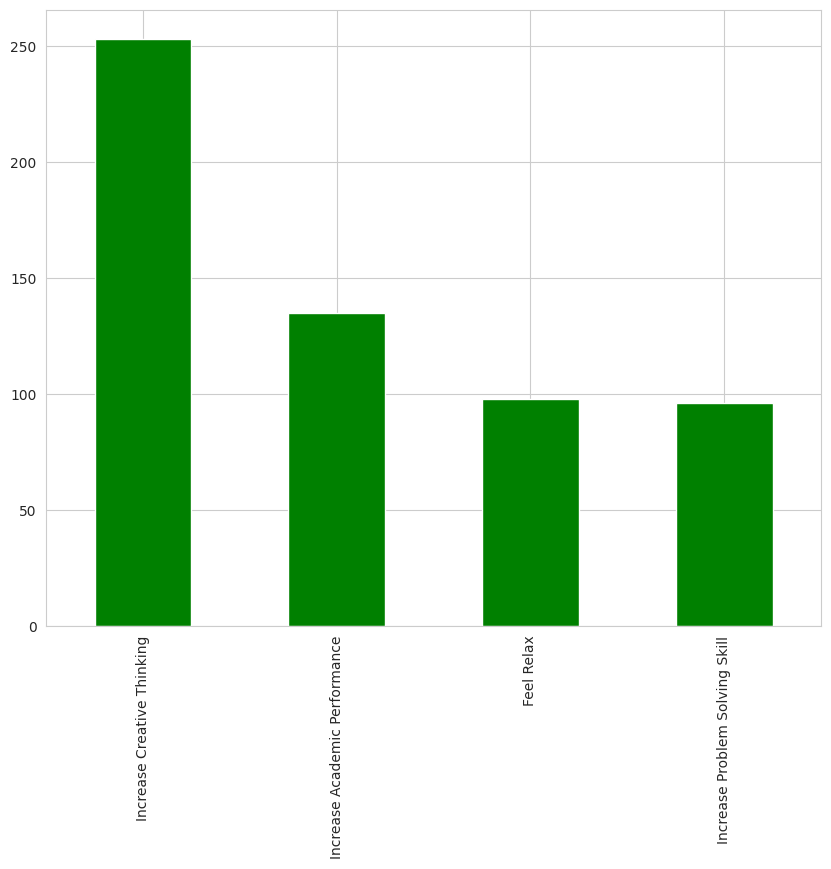

In [54]:
df['What is the change that you fell after reading books'].value_counts().plot(kind="bar",figsize=(10,8), color='green')

# Who influenced you to read books

In [55]:
df["Who influenced you to read books"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
Self Decision,360
Teachers,86
Parents,79
Friends,57


In [56]:
df["Who influenced you to read books"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,4
top,Self Decision
freq,360


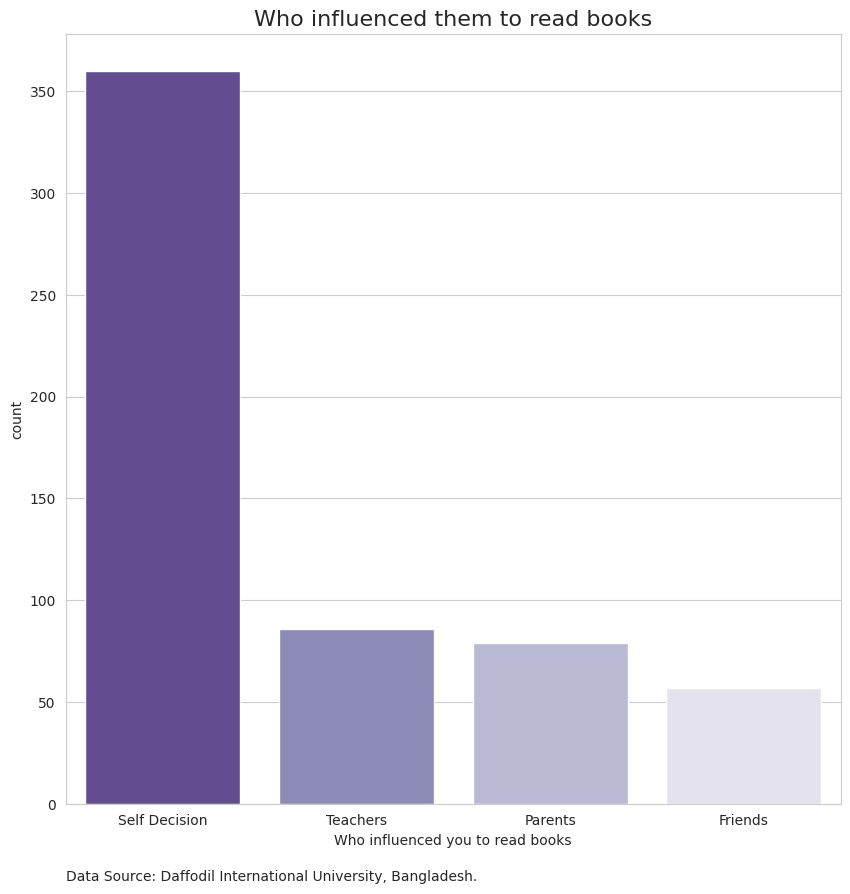

In [57]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "Who influenced you to read books", data = df, palette = "Purples_r", order = df["Who influenced you to read books"].value_counts().index )

# format graph
plt.title("Who influenced them to read books", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

# Which language books do you like to read

In [58]:
df["Which language books do you like to read"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
Bangla,353
English,216
Others,13


In [59]:
df["Which language books do you like to read"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,3
top,Bangla
freq,353


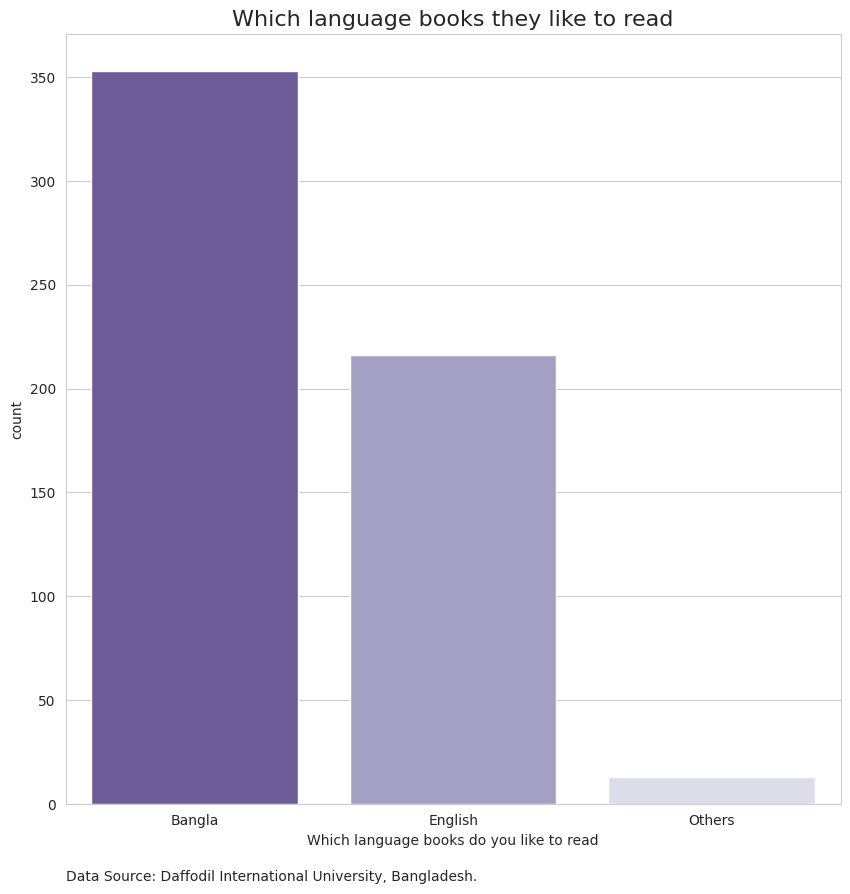

In [60]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "Which language books do you like to read", data = df, palette = "Purples_r", order = df["Which language books do you like to read"].value_counts().index )

# format graph
plt.title("Which language books they like to read", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

# Where do you read printed books

In [61]:
df["Where do you read printed books"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
Home,457
Library,106
During Travel,19


In [ ]:
df["Where do you read printed books"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,571
unique,3
top,Home
freq,449


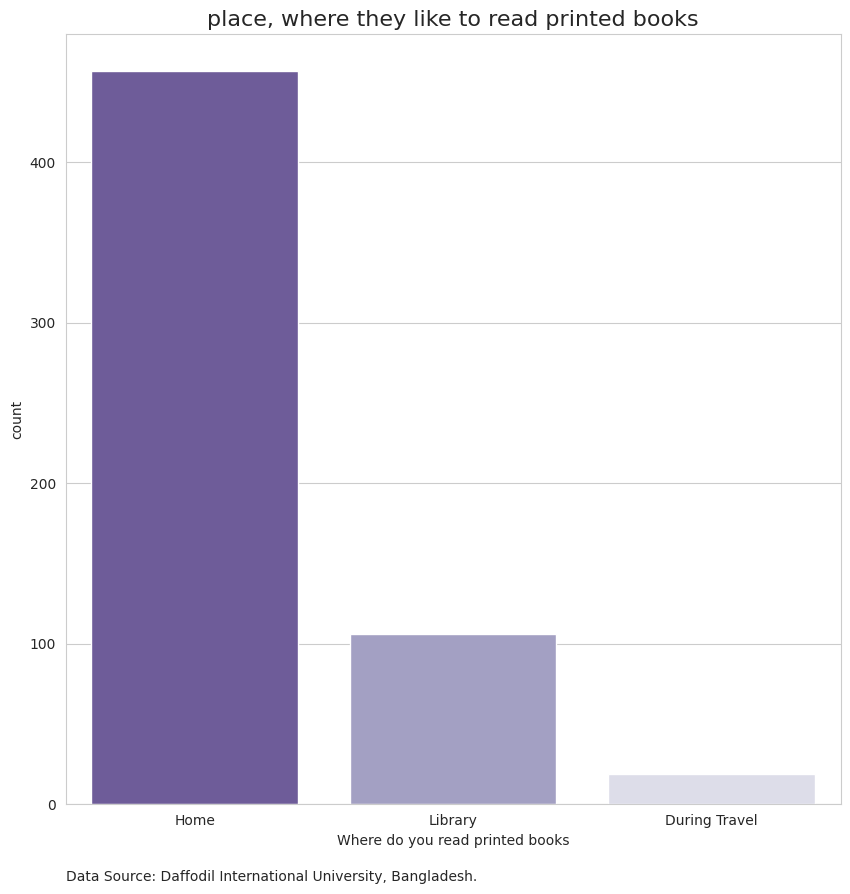

In [62]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "Where do you read printed books", data = df, palette = "Purples_r", order = df["Where do you read printed books"].value_counts().index )

# format graph
plt.title("place, where they like to read printed books", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

# Do you read Newspaper

In [63]:
df["Do you read Newspaper"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
Yes,332
No,250


In [64]:
df["Do you read Newspaper"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,2
top,Yes
freq,332


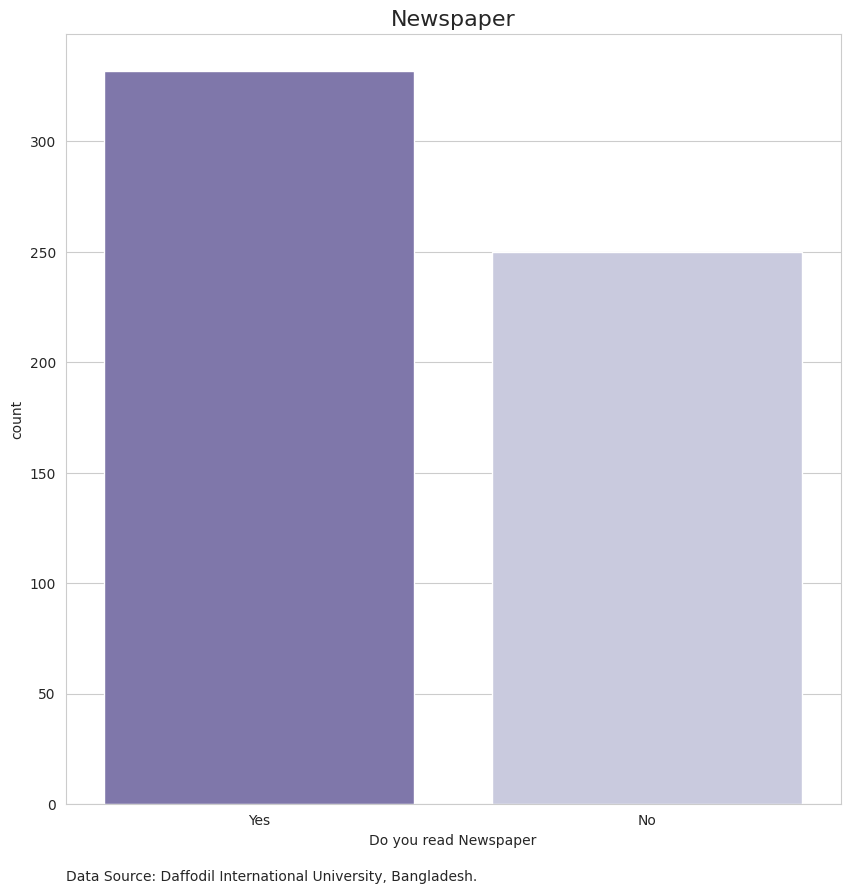

In [65]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "Do you read Newspaper", data = df, palette = "Purples_r", order = df["Do you read Newspaper"].value_counts().index )

# format graph
plt.title("Newspaper", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()

# The format that you used for reading books

In [66]:
df["The format that you used for reading books"].value_counts().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
Both,326
Printed books,161
E-books,95


In [67]:
df["The format that you used for reading books"].describe().rename_axis("Stat").reset_index(name = "value").set_index("Stat")

,value
Stat,
count,582
unique,3
top,Both
freq,326


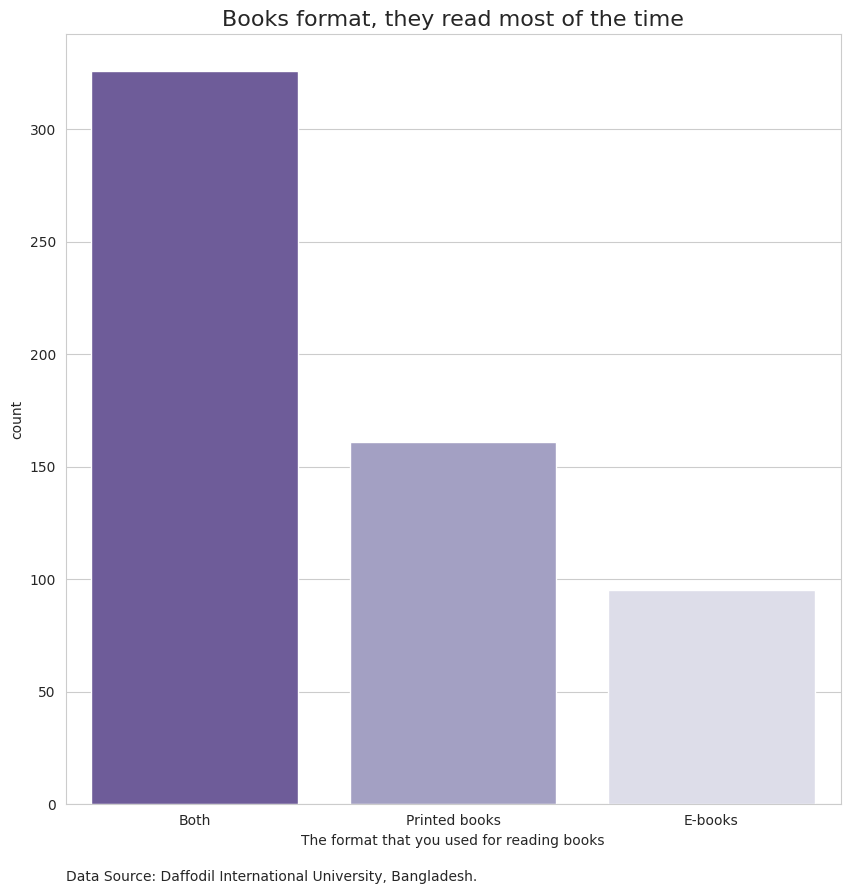

In [68]:
# create graph
plt.figure(figsize=(10,10))
sns.countplot(x= "The format that you used for reading books", data = df, palette = "Purples_r", order = df["The format that you used for reading books"].value_counts().index )

# format graph
plt.title("Books format, they read most of the time", fontsize = 16)
plt.annotate('Data Source: Daffodil International University, Bangladesh.', (0,-.1), xycoords ='axes fraction' )
plt.show()